# Project 1 Airbnb Data

## Second step: use all variables to model the price.

#### try to understand if there is anything about the properties that helps you predict price. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data

# data from Boston
bosc_df=pd.read_csv('boscalendar.csv') 
bosl_df=pd.read_csv('boslistings.csv')
bosr_df=pd.read_csv('bosreviews.csv')


## Look at the data

### calendar data

In [3]:
bosc_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


1308890
4
-------
No missing values:
Index(['listing_id', 'date', 'available'], dtype='object')
-------
ratio of NaN in the price
0.508715782075
-------


,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


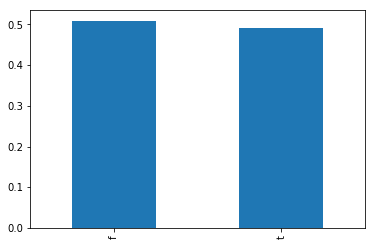

In [4]:
print(bosc_df.shape[0])
print(bosc_df.shape[1])
print('-------')
print ('No missing values:')
print(bosc_df.columns[bosc_df.isnull().mean()==0])
print('-------')
print ('ratio of NaN in the price')
print(bosc_df.price.isnull().mean())
print('-------')
avail_vals=bosc_df.available.value_counts()
(avail_vals/bosc_df.shape[0]).plot(kind="bar")
bosc_df.describe()

### listings data

In [5]:
pd.set_option('display.max_columns', 100)
bosl_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [6]:
print(bosl_df.shape[0])
print(bosl_df.shape[1])
print('-------')
print ('No missing values:')
print(bosl_df.columns[bosc_df.isnull().mean()==0])
print('-------')

print(bosl_df.columns)

3585
95
-------
No missing values:
Index(['id', 'listing_url', 'scrape_id'], dtype='object')
-------
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'long

/Users/sge/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:1700: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 95 but corresponding boolean dimension is 4
  result = getitem(key)


### understand if there is anything about the properties that helps you predict price.

### select the name of columns related to predict the price

#### classify the variables:
price, weekly_price, monthly_price


#### quantitative
host_response_rate, host_acceptance_rate, host_listings_count, host_total_listings_count, latitude, longitude, accommodates, bathrooms, bedrooms, beds, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, number_of_reviews, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, reviews_per_month

#### categorical
experiences_offered, host_response_time, host_is_superhost, host_neighbourhood, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, zipcode, is_location_exact, property_type, room_type, bed_type, calendar_updated, requires_license, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification

#### cleanneed
host_verifications
amenities

#### too complex
host_since
smart_location
calendar_last_scraped
first_review
last_review

#### irrelevant
id
listing_url
scrape_id
last_scraped
name
summary
space
description
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_location
host_about
host_thumbnail_url
host_picture_url
street
city
state
market
country_code
square_feet    nearly all nan
has_availability    all nan
license all nan
jurisdiction_names  all nan



In [7]:
# clean the data needed to be clean  
# host_verifications
# amenities
pd.set_option('display.max_rows', 100)
bosl_df.host_verifications
bosl_df.amenities[0] # this one is too complex to be hold   quote

'{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'

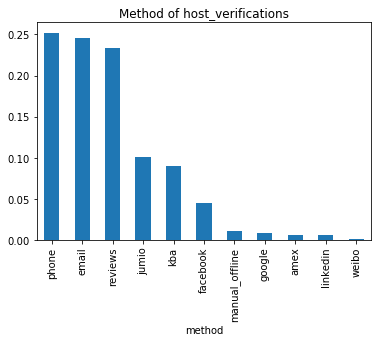

In [25]:
#What are the methods of host_verification

import attach1 as att1

possible_vals = ['email', 'phone', 'facebook', 'linkedin', 'weibo', 'kba', 
                 'amex', 'reviews', 'jumio', 'google', 'manual_offline']


def clean_and_plot(df, title='Method of host_verifications', plot=True):
    '''
    INPUT 
        df - a dataframe holding the host_verifications column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        comm_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the host_verifications column.
    '''
    comm = bosl_df['host_verifications'].value_counts().reset_index()
    comm.rename(columns={'index': 'method', 'host_verifications': 'count'}, inplace=True)
    comm_df = att1.total_count(comm, 'method', 'count', possible_vals)

    comm_df.set_index('method', inplace=True)
    if plot:
        (comm_df/comm_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_comm_df = comm_df/comm_df.sum()
    return props_comm_df
    
props_df = clean_and_plot(bosl_df.host_verifications)


## set up a new dataframe with all relevant data.

In [26]:
# all the quantitative variables
bospriceq_df=bosl_df[['price', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 
                      'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 
                      'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 
                      'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60',
                      'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 
                      'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                      'calculated_host_listings_count', 'reviews_per_month']]
bospriceq_df

,price,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,$250.00,NaN,NaN,1,1,42.282619,-71.133068,4,1.5,2.0,3.0,NaN,$35.00,1,$0.00,2,1125,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,$65.00,100%,100%,1,1,42.286241,-71.134374,2,1.0,1.0,1.0,$95.00,$10.00,0,$0.00,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30
2,$65.00,100%,88%,1,1,42.292438,-71.135765,2,1.0,1.0,1.0,NaN,NaN,1,$20.00,3,45,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,1,0.47
3,$75.00,100%,50%,1,1,42.281106,-71.121021,4,1.0,1.0,2.0,$100.00,$50.00,2,$25.00,1,1125,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00
4,$79.00,100%,100%,1,1,42.284512,-71.136258,2,1.5,1.0,2.0,NaN,$15.00,1,$0.00,2,31,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.25
5,$75.00,100%,95%,2,2,42.291690,-71.131893,2,1.0,1.0,1.0,NaN,$30.00,1,$0.00,2,1125,5,28,58,58,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.70
6,$100.00,98%,96%,5,5,42.281390,-71.131190,3,1.0,1.0,2.0,NaN,NaN,1,$25.00,1,1125,22,39,69,344,57,90.0,10.0,10.0,10.0,10.0,9.0,9.0,3,4.00
7,$75.00,100%,100%,2,2,42.281946,-71.141022,2,2.0,1.0,1.0,NaN,$10.00,1,$15.00,1,1125,30,60,90,365,67,96.0,10.0,10.0,10.0,10.0,10.0,10.0,2,2.38
8,$58.00,100%,100%,1,1,42.285878,-71.124910,2,1.0,1.0,2.0,NaN,NaN,2,$0.00,2,1125,12,42,72,347,65,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1,5.36
9,$229.00,100%,100%,2,2,42.288820,-71.139510,5,1.0,2.0,2.0,$200.00,$50.00,4,$25.00,4,10,20,50,80,107,33,94.0,10.0,9.0,10.0,10.0,9.0,9.0,2,1.01


In [27]:
# all the categorical variables
bospricec_df=bosl_df[['experiences_offered', 'host_response_time', 'host_is_superhost', 'host_neighbourhood', 
                      'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 
                      'zipcode', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'calendar_updated', 
                      'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
                      'require_guest_phone_verification']]

bospricec_df

,experiences_offered,host_response_time,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,is_location_exact,property_type,room_type,bed_type,calendar_updated,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,none,NaN,f,Roslindale,t,f,Roslindale,Roslindale,02131,t,House,Entire home/apt,Real Bed,2 weeks ago,f,f,moderate,f,f
1,none,within an hour,f,Roslindale,t,t,Roslindale,Roslindale,02131,t,Apartment,Private room,Real Bed,a week ago,f,t,moderate,f,f
2,none,within a few hours,t,Roslindale,t,t,Roslindale,Roslindale,02131,t,Apartment,Private room,Real Bed,5 days ago,f,f,moderate,t,f
3,none,within a few hours,f,NaN,t,f,NaN,Roslindale,NaN,f,House,Private room,Real Bed,a week ago,f,f,moderate,f,f
4,none,within an hour,t,Roslindale,t,t,Roslindale,Roslindale,02131,t,House,Private room,Real Bed,2 weeks ago,f,f,flexible,f,f
5,none,within a few hours,t,Roslindale,t,t,Roslindale,Roslindale,02131,t,Condominium,Private room,Real Bed,2 weeks ago,f,f,flexible,f,f
6,none,within an hour,f,Roslindale,t,t,NaN,Roslindale,02131,f,Apartment,Entire home/apt,Real Bed,3 days ago,f,f,strict,f,f
7,none,within a few hours,t,Roslindale,t,t,Roslindale,Roslindale,02131,t,House,Private room,Real Bed,yesterday,f,f,moderate,t,t
8,none,within an hour,t,Roslindale,t,t,Roslindale,Roslindale,02131,t,Condominium,Private room,Real Bed,today,f,f,moderate,f,f
9,none,within an hour,t,Roslindale,t,t,Roslindale,Roslindale,02131,t,Apartment,Entire home/apt,Real Bed,today,f,f,strict,f,f


In [28]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no prices
    2. Create X as all the columns that are not the price column
    3. Create y as the price column
    4. Drop the price column from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    #Drop price columns
    df = df.drop(['price'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
quan_df, y = clean_data(bospriceq_df) 

In [29]:
quan_df

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_rate_10%,host_response_rate_100%,host_response_rate_14%,host_response_rate_17%,host_response_rate_19%,host_response_rate_20%,host_response_rate_25%,host_response_rate_30%,host_response_rate_31%,host_response_rate_33%,host_response_rate_36%,host_response_rate_38%,host_response_rate_40%,host_response_rate_43%,host_response_rate_50%,host_response_rate_56%,host_response_rate_57%,host_response_rate_6%,host_response_rate_60%,host_response_rate_61%,host_response_rate_63%,host_response_rate_64%,host_response_rate_67%,host_response_rate_68%,host_response_rate_69%,...,extra_people_$10.00,extra_people_$100.00,extra_people_$12.00,extra_people_$120.00,extra_people_$125.00,extra_people_$15.00,extra_people_$150.00,extra_people_$16.00,extra_people_$17.00,extra_people_$18.00,extra_people_$19.00,extra_people_$20.00,extra_people_$200.00,extra_people_$22.00,extra_people_$24.00,extra_people_$25.00,extra_people_$27.00,extra_people_$29.00,extra_people_$30.00,extra_people_$33.00,extra_people_$34.00,extra_people_$35.00,extra_people_$36.00,extra_people_$37.00,extra_people_$39.00,extra_people_$40.00,extra_people_$42.00,extra_people_$44.00,extra_people_$45.00,extra_people_$49.00,extra_people_$5.00,extra_people_$50.00,extra_people_$55.00,extra_people_$58.00,extra_people_$59.00,extra_people_$6.00,extra_people_$60.00,extra_people_$62.00,extra_people_$65.00,extra_people_$69.00,extra_people_$7.00,extra_people_$70.00,extra_people_$75.00,extra_people_$77.00,extra_people_$8.00,extra_people_$80.00,extra_people_$85.00,extra_people_$88.00,extra_people_$89.00,extra_people_$9.00
0,1,1,42.282619,-71.133068,4,1.5,2.0,3.00000,1,2,1125,0,0,0,0,0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1,1.970908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,42.286241,-71.134374,2,1.0,1.0,1.00000,0,2,15,26,54,84,359,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,1.300000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,42.292438,-71.135765,2,1.0,1.0,1.00000,1,3,45,19,46,61,319,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1,0.470000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,42.281106,-71.121021,4,1.0,1.0,2.00000,2,1,1125,6,16,26,98,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,42.284512,-71.136258,2,1.5,1.0,2.00000,1,2,31,13,34,59,334,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1,2.250000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,2,42.291690,-71.131893,2,1.0,1.0,1.00000,1,2,1125,5,28,58,58,8,100.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1,1.700000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5,5,42.281390,-71.131190,3,1.0,1.0,2.00000,1,1,1125,22,39,69,344,57,90.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,3,4.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [31]:
## remove '$', ',' and change the type to float.

y=y.map(lambda x: x.lstrip('$'))
y.replace(regex=True,inplace=True,to_replace=',',value='')
y=y.astype(float)
y


0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
5        75.0
6       100.0
7        75.0
8        58.0
9       229.0
10       60.0
11       57.0
12       93.0
13      150.0
14      145.0
15       60.0
16      165.0
17       75.0
18       49.0
19       49.0
20       40.0
21      120.0
22       70.0
23      150.0
24      175.0
25       95.0
26       90.0
27       95.0
28      100.0
29       67.0
30       55.0
31      200.0
32      150.0
33       49.0
34       75.0
35      110.0
36      115.0
37      125.0
38      200.0
39       75.0
40       78.0
41       50.0
42       60.0
43       45.0
44      145.0
45       45.0
46       85.0
47       75.0
48       50.0
49       45.0
        ...  
3535     50.0
3536     75.0
3537     85.0
3538    155.0
3539    272.0
3540    350.0
3541    329.0
3542    140.0
3543     70.0
3544    295.0
3545     80.0
3546    240.0
3547     88.0
3548     80.0
3549     80.0
3550    113.0
3551    180.0
3552     47.0
3553     69.0
3554    125.0
3555  

In [32]:
price_df=pd.DataFrame(y,columns=['price'])
price_df

,price
0,250.0
1,65.0
2,65.0
3,75.0
4,79.0
5,75.0
6,100.0
7,75.0
8,58.0
9,229.0


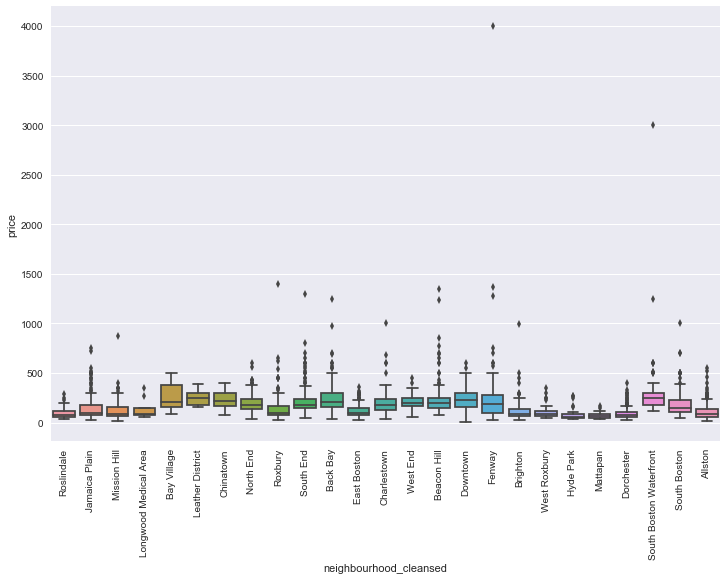

In [34]:
import seaborn as sns
tdata1=pd.concat([price_df, bospricec_df.neighbourhood_cleansed], axis=1)
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price', data = tdata1)
xt = plt.xticks(rotation=90)

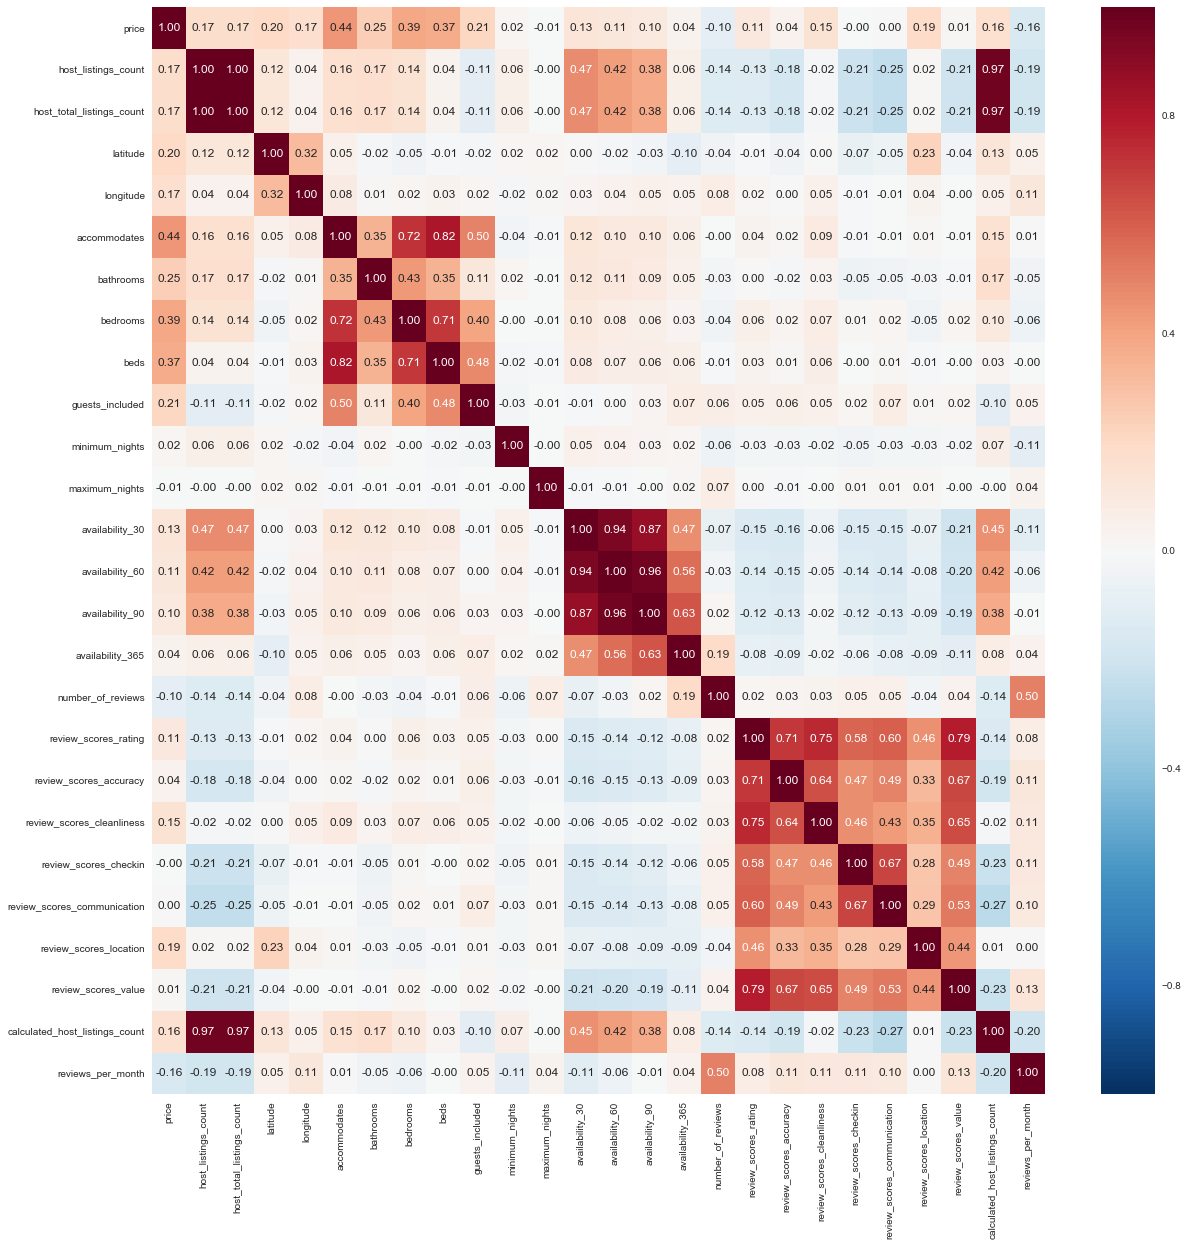

In [35]:
tdata2=pd.concat([price_df, bospriceq_df], axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(tdata2.corr(), annot=True, fmt=".2f")

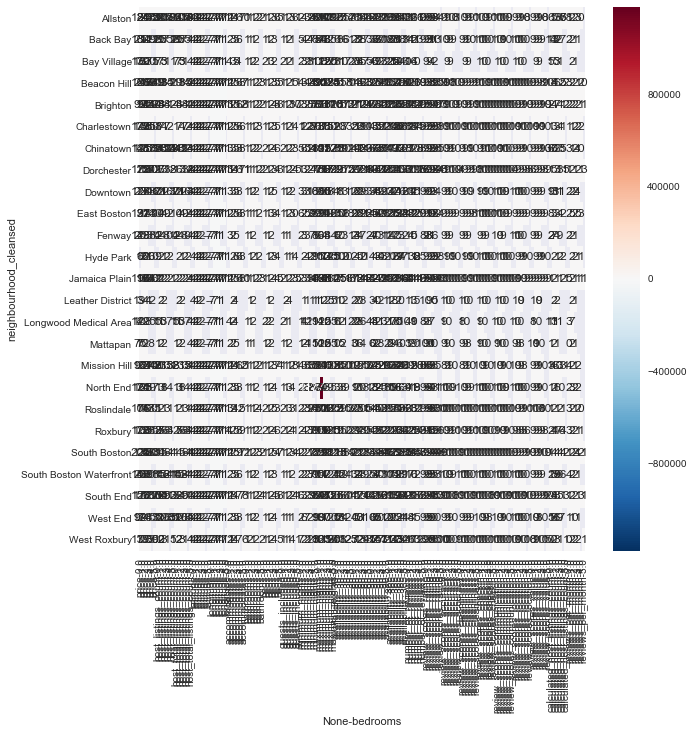

In [35]:
tdata3=pd.concat([price_df, bospriceq_df, bospricec_df], axis=1)
plt.figure(figsize=(10,10))
#sns.heatmap(tdata3.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
sns.heatmap(tdata3.groupby(['neighbourhood_cleansed', 'bedrooms']).mean().unstack(),annot=True, fmt=".0f")

In [44]:
import attach2 as att2
bospriceq_df2=bospriceq_df.drop('price', axis=1)
tdata4=pd.concat([price_df, bospriceq_df2, bospricec_df], axis=1)
X2, y2 = clean_data(tdata4) 

In [45]:
X2

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_rate_10%,host_response_rate_100%,host_response_rate_14%,host_response_rate_17%,host_response_rate_19%,host_response_rate_20%,host_response_rate_25%,host_response_rate_30%,host_response_rate_31%,host_response_rate_33%,host_response_rate_36%,host_response_rate_38%,host_response_rate_40%,host_response_rate_43%,host_response_rate_50%,host_response_rate_56%,host_response_rate_57%,host_response_rate_6%,host_response_rate_60%,host_response_rate_61%,host_response_rate_63%,host_response_rate_64%,host_response_rate_67%,host_response_rate_68%,host_response_rate_69%,...,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,calendar_updated_10 months ago,calendar_updated_11 months ago,calendar_updated_12 months ago,calendar_updated_13 months ago,calendar_updated_14 months ago,calendar_updated_15 months ago,calendar_updated_16 months ago,calendar_updated_17 months ago,calendar_updated_18 months ago,calendar_updated_2 days ago,calendar_updated_2 months ago,calendar_updated_2 weeks ago,calendar_updated_20 months ago,calendar_updated_22 months ago,calendar_updated_23 months ago,calendar_updated_25 months ago,calendar_updated_3 days ago,calendar_updated_3 months ago,calendar_updated_3 weeks ago,calendar_updated_30 months ago,calendar_updated_4 days ago,calendar_updated_4 months ago,calendar_updated_4 weeks ago,calendar_updated_5 days ago,calendar_updated_5 months ago,calendar_updated_5 weeks ago,calendar_updated_6 days ago,calendar_updated_6 months ago,calendar_updated_6 weeks ago,calendar_updated_7 months ago,calendar_updated_7 weeks ago,calendar_updated_8 months ago,calendar_updated_9 months ago,calendar_updated_a week ago,calendar_updated_never,calendar_updated_today,calendar_updated_yesterday,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_profile_picture_t,require_guest_phone_verification_t
0,1,1,42.282619,-71.133068,4,1.5,2.0,3.00000,1,2,1125,0,0,0,0,0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1,1.970908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,42.286241,-71.134374,2,1.0,1.0,1.00000,0,2,15,26,54,84,359,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,1.300000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2,1,1,42.292438,-71.135765,2,1.0,1.0,1.00000,1,3,45,19,46,61,319,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1,0.470000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,1,1,42.281106,-71.121021,4,1.0,1.0,2.00000,2,1,1125,6,16,26,98,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,1,42.284512,-71.136258,2,1.5,1.0,2.00000,1,2,31,13,34,59,334,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1,2.250000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,2,42.291690,-71.131893,2,1.0,1.0,1.00000,1,2,1125,5,28,58,58,8,100.0000

In [46]:
y2

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
5        75.0
6       100.0
7        75.0
8        58.0
9       229.0
10       60.0
11       57.0
12       93.0
13      150.0
14      145.0
15       60.0
16      165.0
17       75.0
18       49.0
19       49.0
20       40.0
21      120.0
22       70.0
23      150.0
24      175.0
25       95.0
26       90.0
27       95.0
28      100.0
29       67.0
30       55.0
31      200.0
32      150.0
33       49.0
34       75.0
35      110.0
36      115.0
37      125.0
38      200.0
39       75.0
40       78.0
41       50.0
42       60.0
43       45.0
44      145.0
45       45.0
46       85.0
47       75.0
48       50.0
49       45.0
        ...  
3535     50.0
3536     75.0
3537     85.0
3538    155.0
3539    272.0
3540    350.0
3541    329.0
3542    140.0
3543     70.0
3544    295.0
3545     80.0
3546    240.0
3547     88.0
3548     80.0
3549     80.0
3550    113.0
3551    180.0
3552     47.0
3553     69.0
3554    125.0
3555  

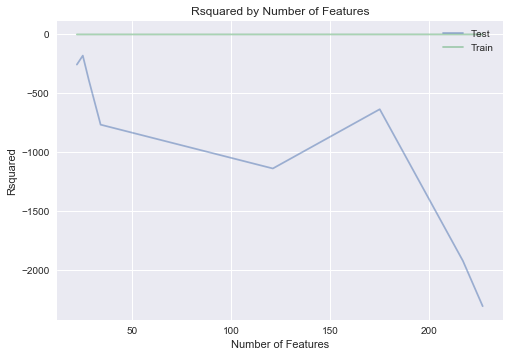

In [47]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = att2.find_optimal_lm_mod(X2, y2, cutoffs)